Step 1: Import required packages

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

Step 2: Import data set

In [13]:
#Load movie names and movie ratings
movies = pd.read_csv('/Machine_Learning_Bootcamp/Session_4_EDA/Data/ml-latest-small/movies.csv')
ratings = pd.read_csv('/Machine_Learning_Bootcamp/Session_4_EDA/Data/ml-latest-small/ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

Step 3: Formatting the data

In [14]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]
ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)

Step 4: Standardization

In [15]:
X_std = StandardScaler().fit_transform(df1)

Step 5: Compute covariance matrix

In [16]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


Step 6: Calculate eigenvectors and eigenvalues

In [17]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-6.17879786e-03+0.00000000e+00j  7.13214703e-03+0.00000000e+00j
   3.60191232e-03+0.00000000e+00j ... -3.89495853e-10-1.12119211e-09j
   4.77289261e-10+0.00000000e+00j  7.72857356e-11+0.00000000e+00j]
 [-1.37389338e-04+0.00000000e+00j -6.19748724e-05+0.00000000e+00j
  -2.68242736e-06+0.00000000e+00j ...  1.88048029e-09-1.41441571e-09j
  -5.39397461e-10+0.00000000e+00j  1.17714325e-11+0.00000000e+00j]
 [ 3.98116838e-05+0.00000000e+00j -1.70073920e-04+0.00000000e+00j
  -3.54723573e-05+0.00000000e+00j ... -6.37709621e-10+3.19742859e-10j
   1.58955020e-10+0.00000000e+00j -2.53499817e-11+0.00000000e+00j]
 ...
 [-5.71402600e-03+0.00000000e+00j  4.61929109e-03+0.00000000e+00j
   3.30601109e-03+0.00000000e+00j ... -1.22733682e-08-2.65130367e-09j
   8.49593065e-09+0.00000000e+00j  2.35143660e-09+0.00000000e+00j]
 [-1.45210348e-02+0.00000000e+00j -3.31390410e-04+0.00000000e+00j
   3.25182697e-03+0.00000000e+00j ...  5.91354593e-08+1.25641448e-09j
  -3.33694022e-08+0.00000000e+00j

Step 7: Compute the feature vector

In [18]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544991
487.22068862940415
438.98894895557345
379.0404527253008
324.31624586524606
259.10919628862763
251.67075199496554
226.0806531649054
206.77043202389638
186.0801200801192
180.3568156736289
150.57689826878504
140.53351042556736
135.00425543775697
116.75931121355654
111.22844429826308
105.98588556399989
101.52061108863413
92.38143975955762
87.20146448316846
83.94704525828452
76.5132907814205
73.12943769509845
71.33450019035207
68.6691687507293
68.1156380513506
66.09778445224141
64.79772886519747
64.76738664208014
60.57541016802256
60.09570157695401
58.44406220313088
57.143880762362805
55.70369700851544
55.153276987646905
54.42361668166457
53.623116971407086
49.754253302721274
49.22568958301038
47.79220889336281
46.743581142451
46.44527988080529
45.339551347469445
45.0999476209656
44.619865966440855
44.25650246763789
43.96138776159145
42.67209649629781
41.738887045202176
41.05033324888577
41.22691039968695
40.02114410412702
39.19814382275338

Step 8: Use the PCA() function to reduce the dimensionality of the data set

In [21]:
pca = PCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


Step 9: Projecting the variance w.r.t the Principle Components

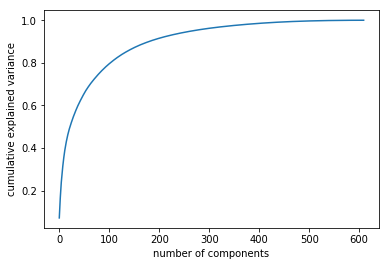

In [23]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()